In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b9c58e41ffc35ed2d27a79098fb3d574ad8e7748615ce87420b04dfe8fbd9a62
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import shap
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
dataset=pd.read_csv('/content/SILHET_diabetes_data_upload.csv')
dataset.shape

(520, 17)

In [ ]:
dataset.isnull().sum()

Age                      0
Gender                   0
Polyuria                 0
Polydipsia               0
sudden weight loss       0
weakness                 0
Polyphagia               0
Genital thrush           0
visual blurring          0
Itching                  0
Irritability             0
delayed healing          0
partial paresis          0
muscle stiffness         0
Alopecia                 0
Obesity                  0
diabetic/non-diabetic    0
dtype: int64

In [ ]:
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:


# create a dictionary to map Yes and No to 1 and 0 respectively
map_dict = {'Yes': 1, 'No': 0}

# use replace method to replace the values in all columns with Yes and No
dataset = dataset.replace(map_dict)

# display the modified DataFrame
print(dataset)


     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40    Male         0           1                   0         1   
1     58    Male         0           0                   0         1   
2     41    Male         1           0                   0         1   
3     45    Male         0           0                   1         1   
4     60    Male         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39  Female         1           1                   1         0   
516   48  Female         1           1                   1         1   
517   58  Female         1           1                   1         1   
518   32  Female         0           0                   0         1   
519   42    Male         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

In [ ]:
# Percentage of Diabetes case in dataset
y=(dataset['diabetic/non-diabetic'] == 'Positive')
percent_pos = sum(y)/len(y)
print('SILHET Percentage Diabetes cases  %d %.02f%%  %d  %.02f%% ' %
      (sum(y) , percent_pos * 100,  len(y) - sum(y), (1-percent_pos)*100 ))
dataset.columns

SILHET Percentage Diabetes cases  320 61.54%  200  38.46% 


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'diabetic/non-diabetic'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder

data_analysis = dataset
le = LabelEncoder()
for col in data_analysis.columns:
    data_analysis[col] = le.fit_transform(data_analysis[col])

In [ ]:
corr=data_analysis.corr()
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,diabetic/non-diabetic
Age,1.000000,0.067835,0.209066,0.130718,0.056937,0.233688,0.325301,0.080612,0.405024,0.293839,0.210919,0.265017,0.236820,0.304223,0.326015,0.149931,0.106419
Gender,0.067835,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.209066,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.130718,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.056937,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.233688,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.325301,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.080612,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.405024,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.293839,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


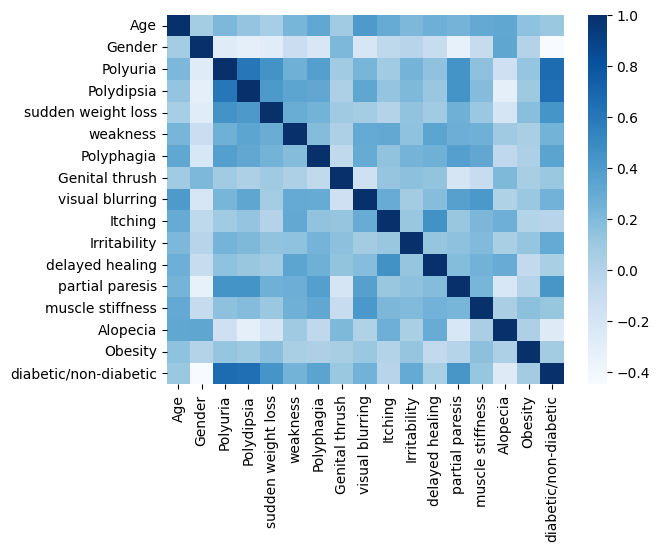

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data_analysis.corr()
sns.heatmap(corr,annot = False, cmap='Blues')
plt.savefig("Figure9b.png", format = 'png', dpi=1200,  bbox_inches='tight')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'Polyuria'),
  Text(4, 0, 'Polydipsia'),
  Text(5, 0, 'sudden weight loss'),
  Text(6, 0, 'weakness'),
  Text(7, 0, 'Polyphagia'),
  Text(8, 0, 'Genital thrush'),
  Text(9, 0, 'visual blurring'),
  Text(10, 0, 'Itching'),
  Text(11, 0, 'Irritability'),
  Text(12, 0, 'delayed healing'),
  Text(13, 0, 'partial paresis'),
  Text(14, 0, 'muscle stiffness'),
  Text(15, 0, 'Alopecia'),
  Text(16, 0, 'Obesity'),
  Text(17, 0, 'diabetic/non-diabetic')])

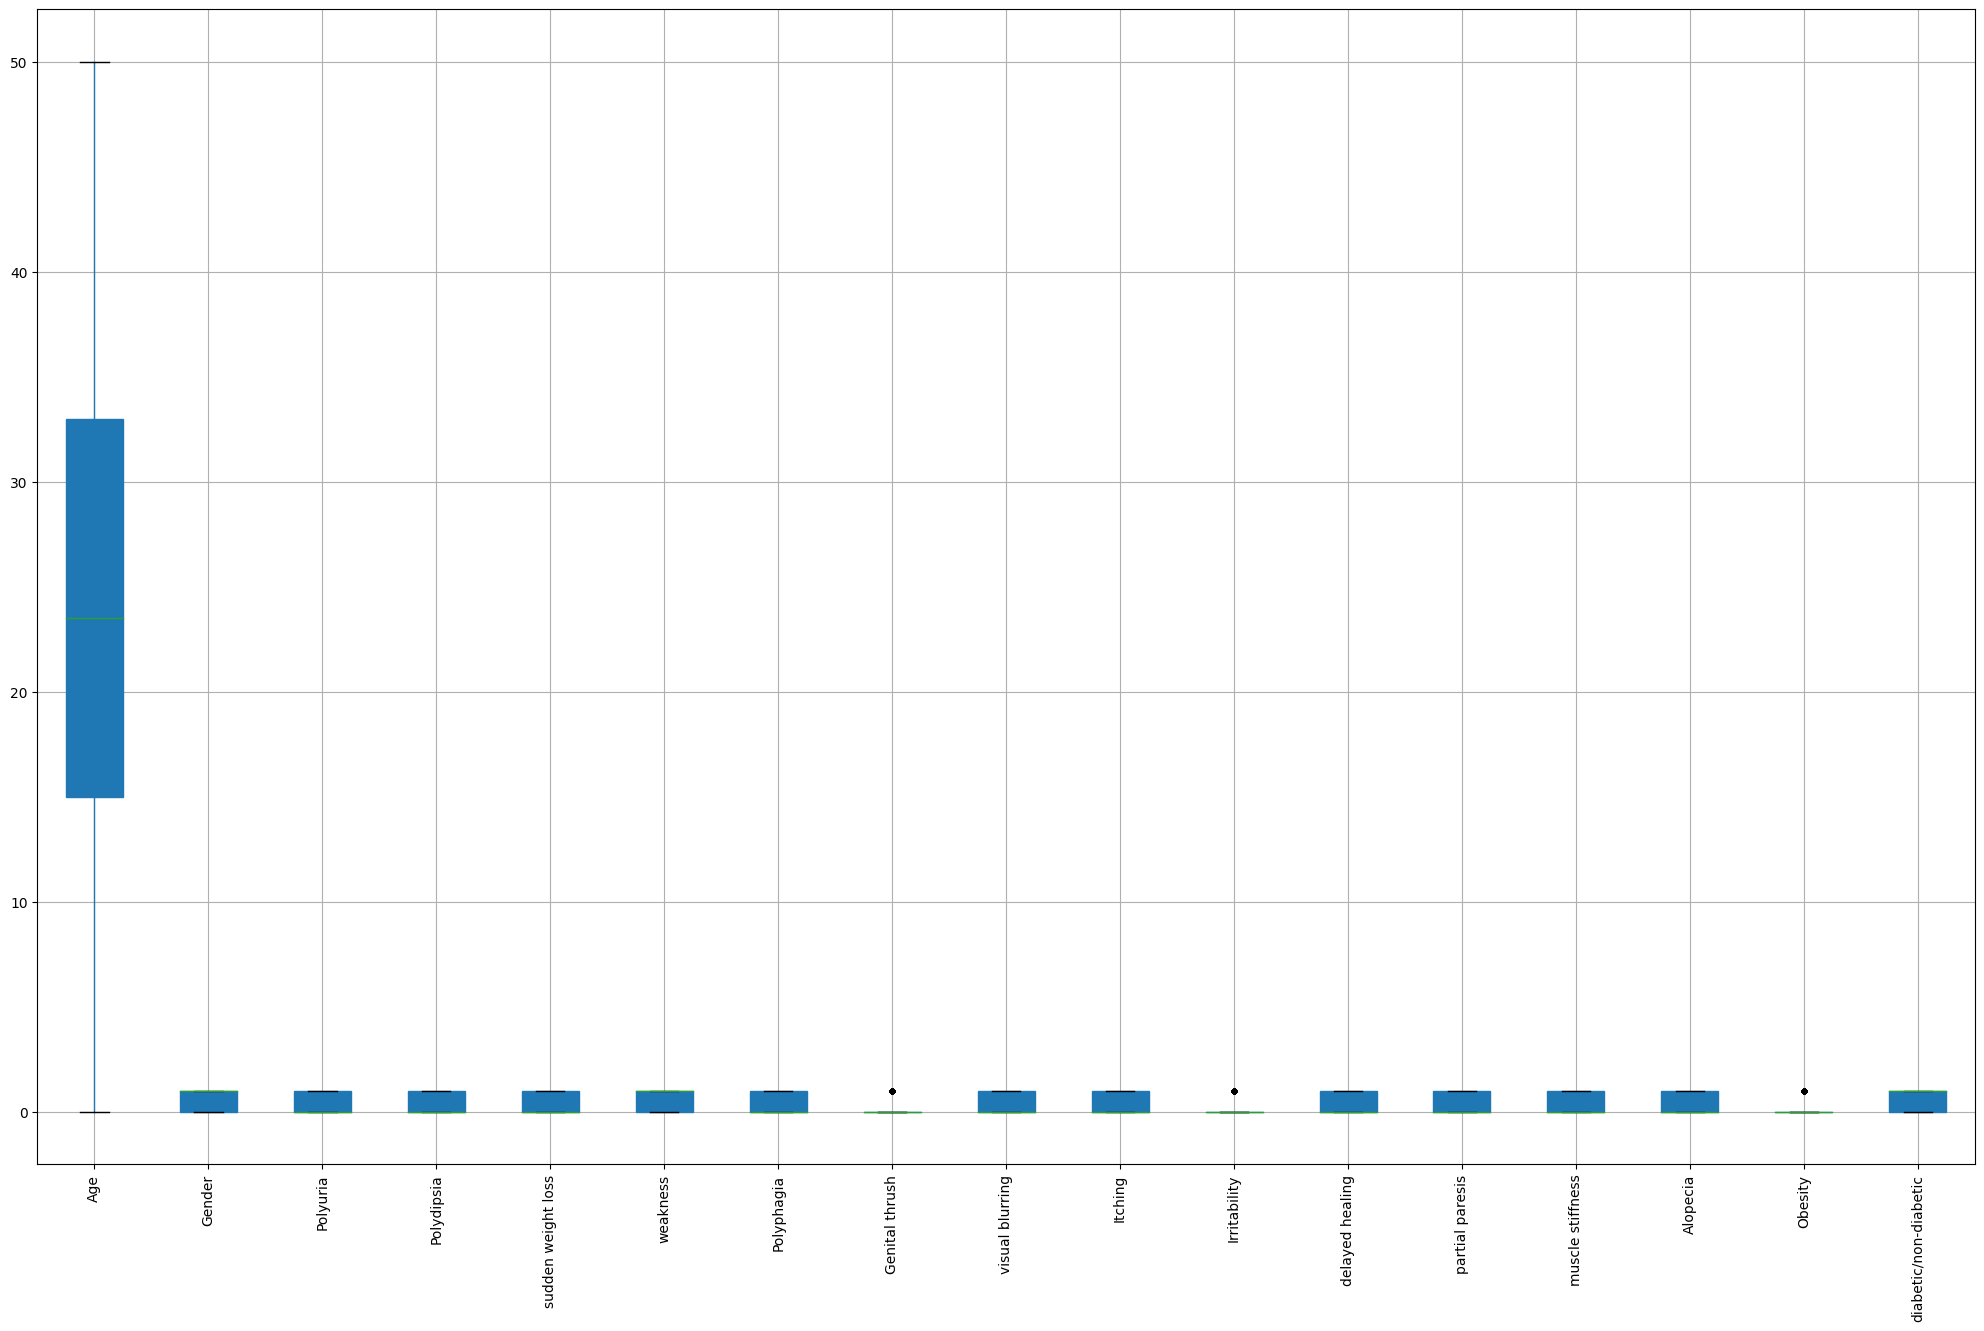

In [ ]:
plt.subplots(figsize=(25,15))
dataset.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

<Axes: >

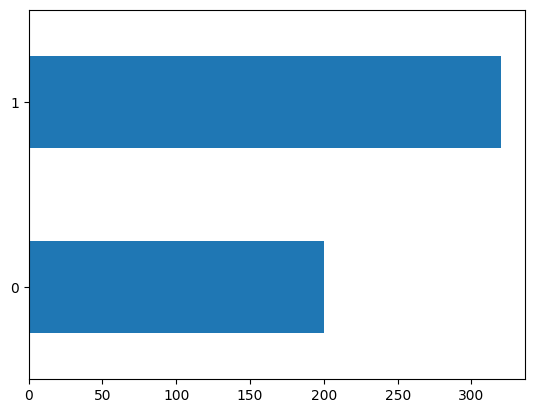

In [ ]:
dataset["diabetic/non-diabetic"].value_counts().sort_index().plot.barh()

In [ ]:
import time
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit


from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [ ]:

def silhet_data_prep(df = None, do_balance = False):
    X = df.drop(["diabetic/non-diabetic"], axis = 1)
    y = df["diabetic/non-diabetic"]

    if do_balance:
        # transform the dataset
        oversample = SMOTE(random_state=123)
        X, y = oversample.fit_resample(X, y)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 123)

    return X, y ,X_train, X_test, y_train, y_test

In [ ]:
# Utility function to train and evaluate a model on silhet dataset
def train_and_evaluate_model(model,X,y, verbose=False, n_splits=10):
    acc = 0
    auc = 0
    f1 = 0
    prec = 0
    recall = 0

    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=123)

    start_time = time.time()
    for train_index, test_index in sss.split(X, y):
        if X is pd.DataFrame:
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        else:
            X_train, X_test = X[train_index], X[test_index]

        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc1 = accuracy_score(y_test, y_pred)
        auc1 = roc_auc_score(y_test, y_pred, average="macro")
        f11 = f1_score(y_test, y_pred, average="macro")
        prec1 = precision_score(y_test, y_pred, average="macro")
        recall1 = recall_score(y_test, y_pred, average="macro")
        if verbose:
            print ('acc', acc1)
            print('f1', f11)
            print('recall1', recall1)
            print('auc1', auc1)
        acc += acc1
        auc += auc1
        f1 += f11
        prec += prec1
        recall += recall1

    spent_time = time.time() - start_time
    print("Acc      F-Meas   Precis   Recall   AUC      Time")
    print("%.04f\t%.04f\t%.04f\t%.04f\t%.04f\t%0.4f" % (acc/n_splits, f1/n_splits, prec/n_splits,
                                            recall/n_splits, auc/n_splits, spent_time))


In [ ]:

# Create tuned model for RF
rf_tuned_nofs_nobl = RandomForestClassifier(max_depth = 5,  max_features = None,
                        criterion = 'entropy', n_estimators = 100, random_state=123)


In [ ]:
# Create tuned model for LR
lr_tuned_nofs_nobl = LogisticRegression(C = 16, solver = 'lbfgs', max_iter = 200, random_state=123)

In [ ]:
# Create tuned model for SVM
svm_tuned_nofs_nobl = SVC(C = 1, kernel = 'linear', max_iter = 1000, random_state=123)

In [ ]:
# Define the hyperparameters for tuning
max_depth = 10
min_samples_split = 5
min_samples_leaf = 4
criterion = 'entropy'

# Create the decision tree model with tuned hyperparameters
dt_tuned_nofs_nobl = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   random_state=123)


In [ ]:
# Create tuned model for Extra Tree Classifier
et_tuned_nofs_nobl = ExtraTreesClassifier(max_depth = 5,  max_features = None,
                        criterion = 'entropy', n_estimators = 100, random_state=123)


In [ ]:
# Create tuned model for Xgboost Classifier
xgb_tuned_nofs_nobl = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,
                                    subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,
                                    random_state=123)


In [ ]:
# Create tuned model for KNeighbors Classifier
knn_tuned_nofs_nobl = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=1)


In [ ]:
# Create a tuned model for GradientBoostingClassifier
gbc_tuned_nofs_nobl = GradientBoostingClassifier(max_depth=2, n_estimators=100, random_state=123)




In [ ]:
# Create a tuned model for AdaBoostClassifier
ada_tuned_nofs_nobl = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=123)


In [ ]:
dataset = dataset.replace({'Gender': {'Male': 1, 'Female': 0}})


In [ ]:
dataset = dataset.replace({'diabetic/non-diabetic': {'Positive': 1, 'Negative': 0}})

In [ ]:
# Prepare dataset with No feature Selection No balancing
X,y, X_train, X_test, y_train, y_test = silhet_data_prep(dataset, do_balance=False)

#  Train and evaluate the Random Forest Model
train_and_evaluate_model(rf_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the SVM Model
train_and_evaluate_model(svm_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Logistic Regression Model
train_and_evaluate_model(lr_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Decision Tree  Model
train_and_evaluate_model(dt_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Extra Tree  Model
train_and_evaluate_model(et_tuned_nofs_nobl, X, y, verbose=False)
#  Train and evaluate the Xgboost  Model
train_and_evaluate_model(xgb_tuned_nofs_nobl, X, y, verbose=False)
# Train and evaluate the GradientBoostingClassifier model
train_and_evaluate_model(gbc_tuned_nofs_nobl, X, y, verbose=False)
# Train and evaluate the AdaBoost model
train_and_evaluate_model(ada_tuned_nofs_nobl, X, y, verbose=False)


Acc      F-Meas   Precis   Recall   AUC      Time
0.9577	0.9560	0.9522	0.9619	0.9619	1.9166
Acc      F-Meas   Precis   Recall   AUC      Time
0.9231	0.9190	0.9187	0.9206	0.9206	0.1096


Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


Acc      F-Meas   Precis   Recall   AUC      Time
0.9250	0.9208	0.9213	0.9212	0.9212	0.1553
Acc      F-Meas   Precis   Recall   AUC      Time
0.9167	0.9133	0.9109	0.9201	0.9201	0.0890
Acc      F-Meas   Precis   Recall   AUC      Time
0.9397	0.9370	0.9340	0.9423	0.9423	1.4318
Acc      F-Meas   Precis   Recall   AUC      Time
0.9660	0.9643	0.9622	0.9671	0.9671	0.5896
Acc      F-Meas   Precis   Recall   AUC      Time
0.9462	0.9434	0.9418	0.9459	0.9459	0.9715
Acc      F-Meas   Precis   Recall   AUC      Time
0.9051	0.8991	0.9040	0.8970	0.8970	2.0034


In [ ]:
# Do prediction (example) with the trained model
y_pred_ran = rf_tuned_nofs_nobl.predict(X_test)

In [ ]:
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_ran)
auc1 = roc_auc_score(y_test, y_pred_ran, average="macro")
f11 = f1_score(y_test, y_pred_ran, average="macro")
prec1 = precision_score(y_test, y_pred_ran, average="macro")
recall1 = recall_score(y_test,y_pred_ran , average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9807692307692307
f1 0.9800808682698446
recall1 0.9840425531914894
auc1 0.9840425531914894
precision 0.976923076923077


In [ ]:
y_pred_svc = svm_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_svc)
auc1 = roc_auc_score(y_test, y_pred_svc, average="macro")
f11 = f1_score(y_test, y_pred_svc, average="macro")
prec1 = precision_score(y_test, y_pred_svc, average="macro")
recall1 = recall_score(y_test, y_pred_svc, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9551282051282052
f1 0.9532834224598931
recall1 0.9545298558682225
auc1 0.9545298558682225
precision 0.9521249359959038


In [ ]:
y_pred_lr = lr_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_lr)
auc1 = roc_auc_score(y_test, y_pred_lr, average="macro")
f11 = f1_score(y_test, y_pred_lr, average="macro")
prec1 = precision_score(y_test, y_pred_lr, average="macro")
recall1 = recall_score(y_test, y_pred_lr, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9487179487179487
f1 0.9464653397391902
recall1 0.9464653397391901
auc1 0.9464653397391903
precision 0.9464653397391901


In [ ]:
y_pred_dt = dt_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_dt)
auc1 = roc_auc_score(y_test, y_pred_dt, average="macro")
f11 = f1_score(y_test, y_pred_dt, average="macro")
prec1 = precision_score(y_test, y_pred_dt, average="macro")
recall1 = recall_score(y_test, y_pred_dt, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9615384615384616
f1 0.9600614439324117
recall1 0.9625943719972547
auc1 0.9625943719972547
precision 0.9578804347826086


In [ ]:
y_pred = et_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_pred, average="macro")
f11 = f1_score(y_test, y_pred, average="macro")
prec1 = precision_score(y_test, y_pred, average="macro")
recall1 = recall_score(y_test, y_pred, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9743589743589743
f1 0.9735054347826086
recall1 0.9787234042553192
auc1 0.9787234042553192
precision 0.9696969696969697


In [ ]:
y_pred_xgb = xgb_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred_xgb)
auc1 = roc_auc_score(y_test, y_pred_xgb, average="macro")
f11 = f1_score(y_test, y_pred_xgb, average="macro")
prec1 = precision_score(y_test, y_pred_xgb, average="macro")
recall1 = recall_score(y_test, y_pred_xgb, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)
print('precision', prec1)

acc 0.9935897435897436
f1 0.9933262032085561
recall1 0.9946808510638299
auc1 0.9946808510638299
precision 0.9920634920634921


In [ ]:
y_pred = gbc_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_pred, average="macro")
f11 = f1_score(y_test, y_pred, average="macro")
prec1 = precision_score(y_test, y_pred, average="macro")
recall1 = recall_score(y_test, y_pred, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)

acc 0.9743589743589743
f1 0.9735054347826086
recall1 0.9787234042553192
auc1 0.9787234042553192


In [ ]:
y_pred = ada_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_pred, average="macro")
f11 = f1_score(y_test, y_pred, average="macro")
prec1 = precision_score(y_test, y_pred, average="macro")
recall1 = recall_score(y_test, y_pred, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)

acc 0.9230769230769231
f1 0.918224707321335
recall1 0.9114619080301991
auc1 0.9114619080301991


In [ ]:
y_pred = ada_tuned_nofs_nobl.predict(X_test)
# if We have the labels with can also evaluate the prediction
acc1 = accuracy_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_pred, average="macro")
f11 = f1_score(y_test, y_pred, average="macro")
prec1 = precision_score(y_test, y_pred, average="macro")
recall1 = recall_score(y_test, y_pred, average="macro")
print ('acc', acc1)
print('f1', f11)
print('recall1', recall1)
print('auc1', auc1)

acc 0.9230769230769231
f1 0.918224707321335
recall1 0.9114619080301991
auc1 0.9114619080301991


Confusion Matrix:
[[62  0]
 [ 1 93]]


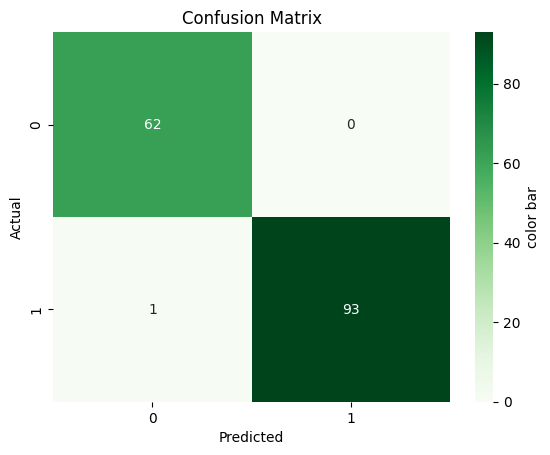

In [ ]:
cm=confusion_matrix(y_test,y_pred_xgb,labels=[0,1])
print("Confusion Matrix:")
print(cm)
# --- ---- ---- heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[62  0]
 [ 3 91]]


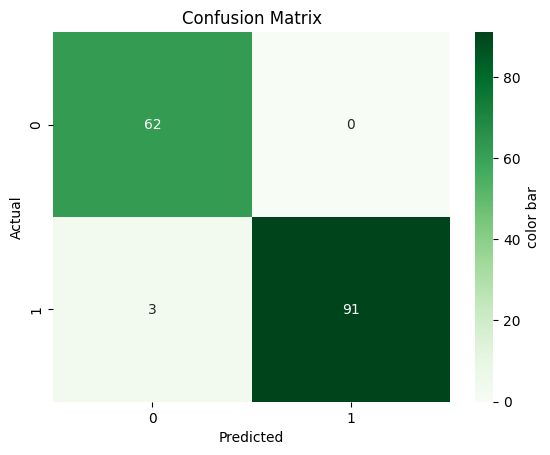

In [ ]:
cm=confusion_matrix(y_test,y_pred_ran,labels=[0,1])
print("Confusion Matrix:")
print(cm)
# --- ---- ---- heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[60  2]
 [ 4 90]]


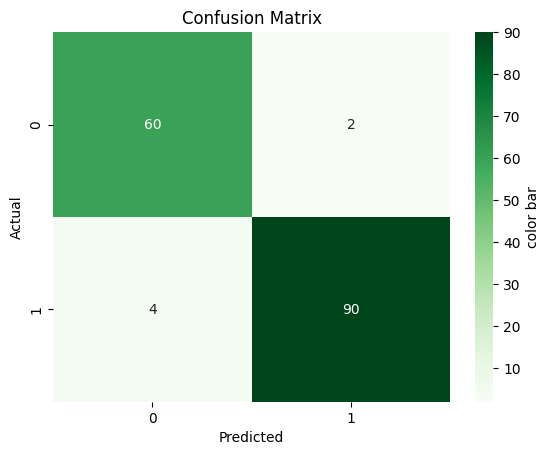

In [ ]:
cm=confusion_matrix(y_test,y_pred_dt,labels=[0,1])
print("Confusion Matrix:")
print(cm)
# --- ---- ---- heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix:
[[59  3]
 [ 4 90]]


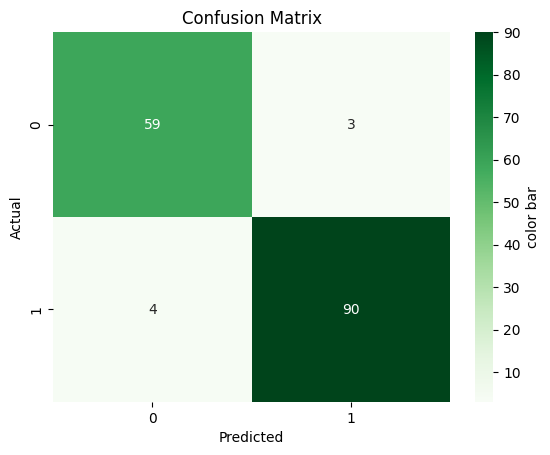

In [ ]:
cm=confusion_matrix(y_test,y_pred_svc,labels=[0,1])
print("Confusion Matrix:")
print(cm)
# --- ---- ---- heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,cmap="Greens",annot=True,
            cbar_kws={"orientation":"vertical","label":"color bar"},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

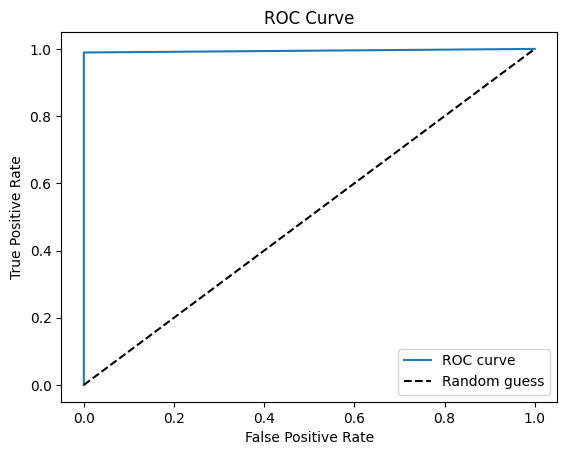

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



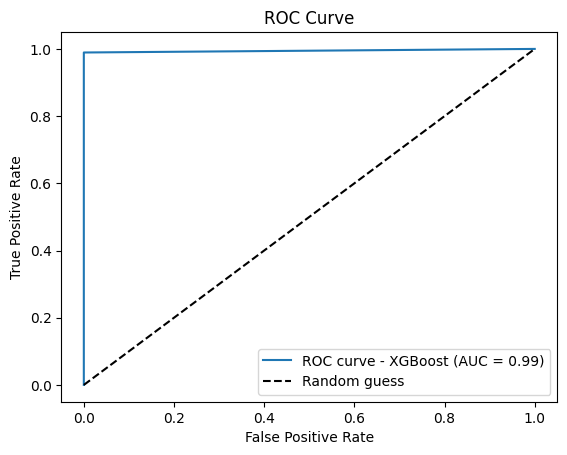

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_xgb)

plt.plot(fpr, tpr, label='ROC curve - XGBoost (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


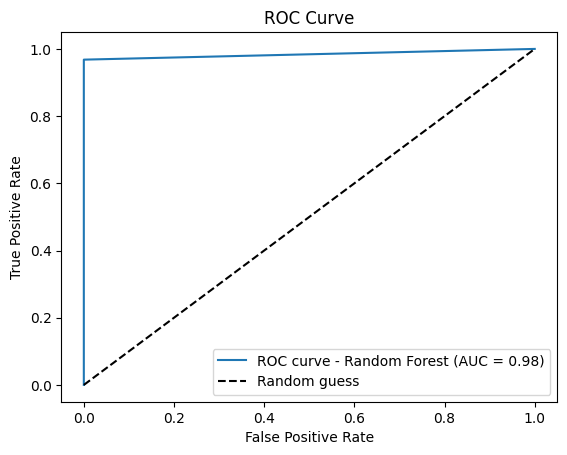

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ran)
auc = roc_auc_score(y_test, y_pred_ran)

plt.plot(fpr, tpr, label='ROC curve - Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


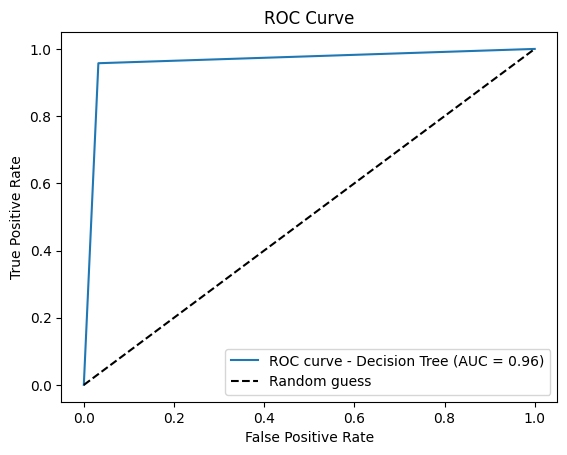

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_pred_dt)

plt.plot(fpr, tpr, label='ROC curve - Decision Tree (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


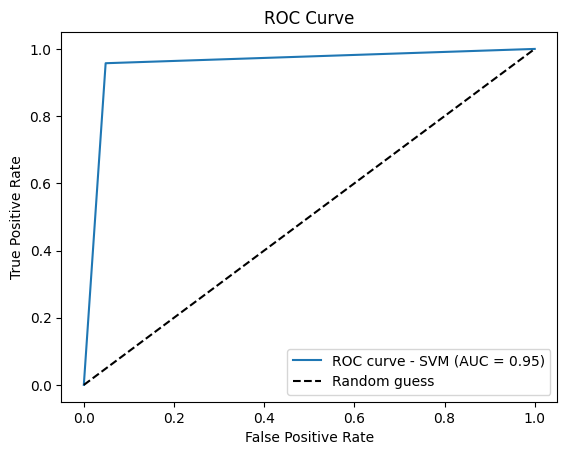

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
auc = roc_auc_score(y_test, y_pred_svc)

plt.plot(fpr, tpr, label='ROC curve - SVM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

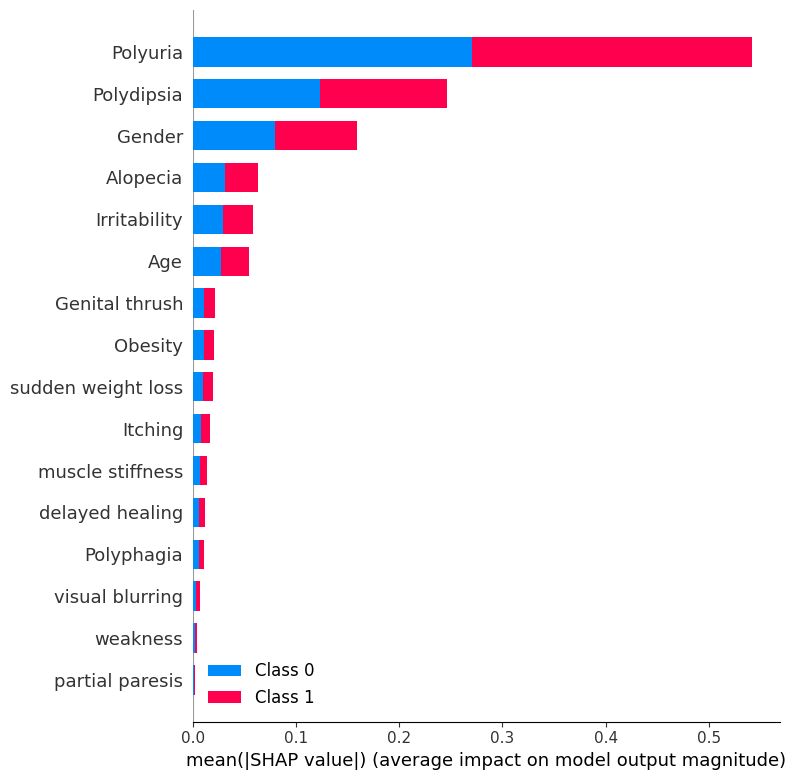

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)



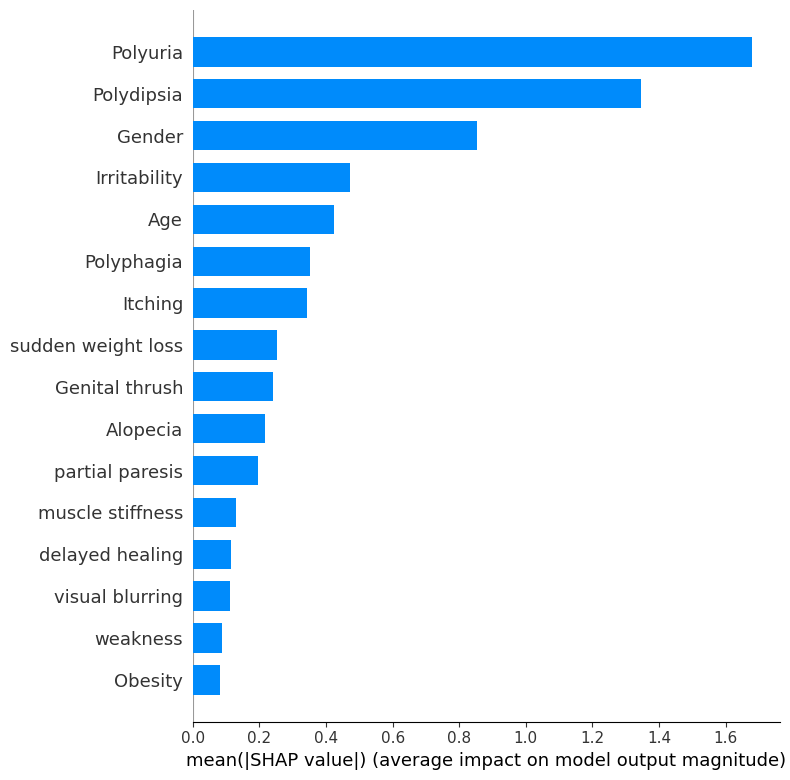

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(xgb_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

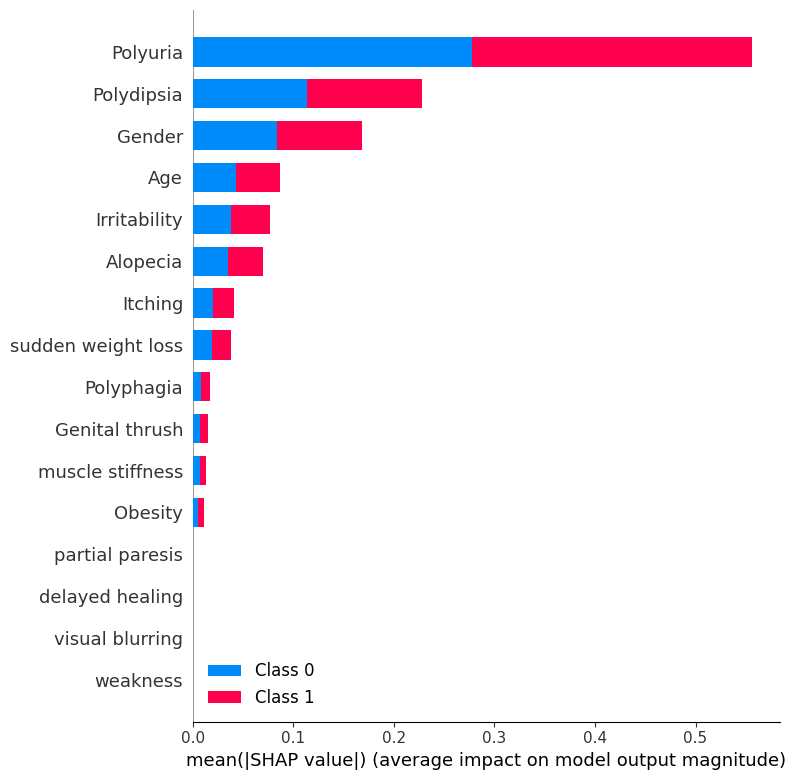

In [ ]:
feature_names = dataset.columns[:-1].tolist()
explainer = shap.TreeExplainer(dt_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

In [ ]:
explainer = LimeTabularExplainer(X_train, feature_names = dataset.columns[:-1], class_names=['non-diabetic', 'diabetic'])


In [ ]:
explanation = explainer.explain_instance(X_test[0], rf_tuned_nofs_nobl.predict_proba)



In [ ]:
print('Top features that contribute to the prediction:')
for feature, weight in explanation.as_list():
    print('{}: {:.3f}'.format(feature, weight))


Top features that contribute to the prediction:
0.00 < Polyuria <= 1.00: 0.448
0.00 < Polydipsia <= 1.00: 0.217
Gender <= 0.00: 0.147
Alopecia <= 0.00: 0.093
Irritability > 0.25: 0.078
Obesity <= 0.00: 0.062
Genital thrush <= 0.00: -0.039
0.00 < Itching <= 1.00: -0.034
0.00 < muscle stiffness <= 1.00: -0.020
0.00 < Polyphagia <= 1.00: 0.019


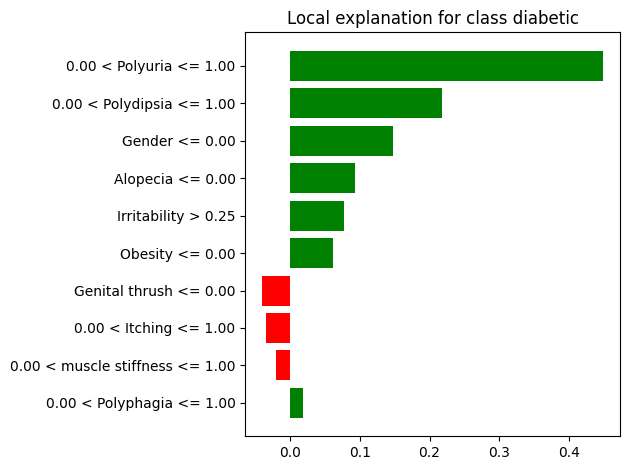

In [ ]:
fig = explanation.as_pyplot_figure()
fig.tight_layout()

In [ ]:
#newwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww
# Select a test data point for which you want to generate SHAP values
test_data_index = 0  # Replace with the index of the test data point you want to explain
test_data_point = X_test[test_data_index:test_data_index+1]  # Extract the single test data point

# Initialize the SHAP explainer with the trained model and dataset
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(test_data_point)

# Display the SHAP force plot for the test data point
shap.initjs()  # Ensure that JavaScript is initialized for the visualization
shap.force_plot(explainer.expected_value[1], shap_values[1][test_data_index], test_data_point, feature_names=feature_names)

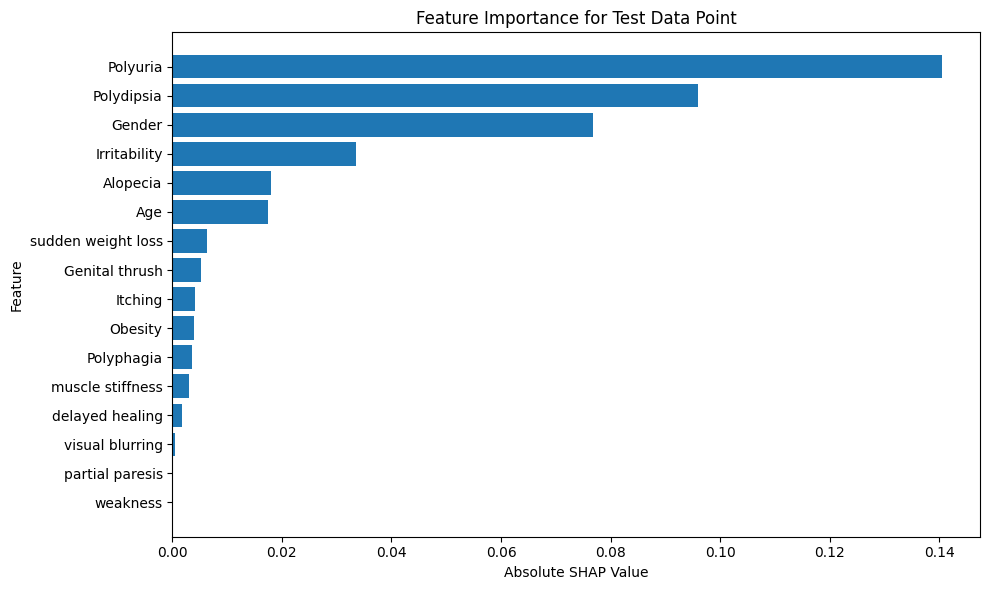

In [ ]:

# ... (data preparation, model training, etc.)

# Select a test data point for which you want to generate SHAP values
test_data_index = 0  # Replace with the index of the test data point you want to explain
test_data_point = X_test[test_data_index:test_data_index+1]  # Extract the single test data point

# Initialize the SHAP explainer with the trained model and dataset
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(test_data_point)

# Calculate the absolute SHAP values to get feature importance
abs_shap_values = np.abs(shap_values[1][0])

# Get feature names
feature_names = dataset.columns.tolist()

# Sort features and SHAP values in descending order of importance
sorted_idx = np.argsort(abs_shap_values)
sorted_features = np.array(feature_names)[sorted_idx]
sorted_shap_values = abs_shap_values[sorted_idx]

# Plot the feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_shap_values, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Test Data Point')
plt.tight_layout()
plt.show()

In [ ]:
explainer = LimeTabularExplainer(training_data=X_train, mode="classification", training_labels=y_train, feature_names=feature_names)
explanation = explainer.explain_instance(test_data_point[0], rf_tuned_nofs_nobl.predict_proba)
explanation.show_in_notebook()

In [ ]:
!pip install -U shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
explainer = shap.TreeExplainer(rf_tuned_nofs_nobl)
shap_values = explainer.shap_values(X_test)
# plot SHAP force plot with feature names
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], feature_names=feature_names)
